In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from math import sqrt, log10, log

In [99]:
def parse_dollar(an_amount):
    return int(an_amount.replace("$", "").replace(",",""))
def make_k(an_amount):
    return "${}k".format(round(an_amount/1000))
def make_percent(an_amount):
    return "{}%".format(round(100 * an_amount))
def split_groups(dataframe):
    values_per_group = {col_name:col for col_name, col in dataframe.groupby(1)[2]}
    return values_per_group.values()
def analyze_pvalue(pvalue):
    if pvalue < .05:
        print("Significantly different")

In [31]:
salaries = pd.read_csv('VTsalaries.csv')
salaries.columns = ['Name', 'Title', 'Pay']
salaries['Pay'] = salaries['Pay'].map(parse_dollar)

print(salaries.groupby("Title")["Pay"].median().sort_values().map(make_k)) #.to_string()

Title
Food Service Technician I          $22k
Hsekeep &/or Apparel Worker I      $22k
Trades Technician I                $23k
Food Service Technician II         $24k
Agricultural Specialist I          $25k
Admin and Office Spec II           $27k
Trainer and Instructor I           $28k
Security Officer II                $28k
Printing Technician II             $28k
Trades Technician II               $28k
Hsekeep &/or Apparel Worker II     $29k
Emergency Coordinator I            $29k
Laboratory and Research Tech       $29k
Licensed Practical Nurse           $29k
Store & Warehouse Spec II          $30k
Security Officer III               $30k
Education Support Spec I           $30k
Direct Service Associate III       $30k
Utility Plant Specialist I         $31k
Transportation Operator II         $31k
Food Service Technician III        $31k
Compliance/Safety Officer II       $32k
Natural Resource Spec II           $33k
Direct Service Associate II        $33k
Agricultural Specialist II        

In [68]:
import gender_guesser.detector as gender

GENDER_VALUES = {
    'unknown': 0,
    'andy': 0,
    'male': -1,
    'female': 1,
    'mostly_male': -.5,
    'mostly_female': .5
}

gd = gender.Detector()
def estimate_gender(names):
    name_parts = names.strip().split()
    genders = [gd.get_gender(name.strip()) for name in name_parts[:-1]]
    gender_values = [GENDER_VALUES[gender] for gender in genders]
    estimated_gender = sum(gender_values)
    if estimated_gender < 0:
        return 'Male'
    elif estimated_gender > 0:
        return 'Female'
    else:
        return 'Unknown'
salaries['Gender'] = salaries['Name'].apply(estimate_gender)
named_salaries = salaries[salaries.Name != '(Name withheld)']
gendered = named_salaries.groupby("Gender")

In [78]:
# Counts
gendered_count= pd.DataFrame()

gendered_count['Count'] = gendered["Pay"].count()

gendered_count['Percentage'] = (gendered["Pay"].count()/len(named_salaries)).map(make_percent)

print(gendered_count)

         Count Percentage
Gender                   
Female    1491        36%
Male      2250        54%
Unknown    416        10%


In [81]:
# Mean Pay
gendered_stats = pd.DataFrame()

gendered_stats['Mean'] = gendered["Pay"].mean().sort_values().map(make_k)
gendered_stats['Median'] = gendered["Pay"].median().sort_values().map(make_k)
gendered_stats['Std'] = gendered["Pay"].std().sort_values().map(make_k)
print(gendered_stats)

#.to_string(header=False)

          Mean Median   Std
Gender                     
Female    $84k   $71k  $38k
Unknown   $99k   $83k  $56k
Male     $102k   $87k  $56k


Significantly different


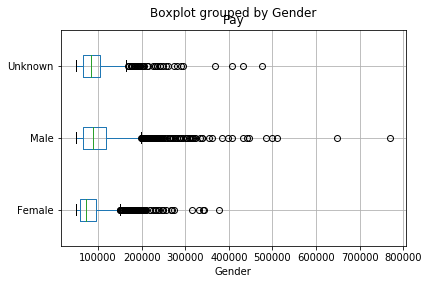

In [121]:
# Anova
female_pay = gendered.get_group('Female').Pay.map(log10).values
male_pay = gendered.get_group('Male').Pay.map(log10).values
statistic, pvalue = st.mannwhitneyu(female_pay,male_pay)
analyze_pvalue(pvalue)
named_salaries.boxplot(column='Pay', by='Gender', vert=False)
plt.show()